<a href="https://colab.research.google.com/github/ravishankarramakrishnan/Deep_Learning_Practice/blob/master/Fine_Tune_BERT_for_Text_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align=center> Fine-Tune BERT for Text Classification with TensorFlow</h2>

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 1: BERT Classification Model</p>
</div>

Token Ids - Tokenized Input Text.

Generate Input Type IDs - Helps Distinguish between different sentences.

Generate Input Mask - Used to note relevant tokens within the input word IDs tensor.

There are some preprocessing steps to convert raw data to a form that BERT model accepts as input.


In this [project](https://www.coursera.org/projects/fine-tune-bert-tensorflow/), you will learn how to fine-tune a BERT model for text classification and Sentiment Analysis using TensorFlow and TF-Hub.


The pretrained BERT model used in this project is [available](https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2) on [TensorFlow Hub](https://tfhub.dev/).
<br>

BERT is much preferred as it can create "CONTEXTUAL WORD EMBEDDINGS" rather than just word embeddings

Data: Quora Insincere Questions Dataset


### Learning Objectives

By the time you complete this project, you will be able to:

- Build TensorFlow Input Pipelines for Text Data with the [`tf.data`](https://www.tensorflow.org/api_docs/python/tf/data) API
- Tokenize and Preprocess Text for BERT
- Fine-tune BERT for text classification with TensorFlow 2 and [TF Hub](https://tfhub.dev)

### Prerequisites

In order to be successful with this project, it is assumed you are:

- Competent in the Python programming language
- Familiar with deep learning for Natural Language Processing (NLP)
- Familiar with TensorFlow, and its Keras API

### Contents

This project/notebook consists of several Tasks.

- **[Task 1]()**: Introduction to the Project.
- **[Task 2]()**: Setup your TensorFlow and Colab Runtime
- **[Task 3]()**: Download and Import the Quora Insincere Questions Dataset
- **[Task 4]()**: Create tf.data.Datasets for Training and Evaluation
- **[Task 5]()**: Download a Pre-trained BERT Model from TensorFlow Hub
- **[Task 6]()**: Tokenize and Preprocess Text for BERT
- **[Task 7]()**: Wrap a Python Function into a TensorFlow op for Eager Execution
- **[Task 8]()**: Create a TensorFlow Input Pipeline with `tf.data`
- **[Task 9]()**: Add a Classification Head to the BERT `hub.KerasLayer`
- **[Task 10]()**: Fine-Tune BERT for Text Classification
- **[Task 11]()**: Evaluate the BERT Text Classification Model

## Task 2: Setup your TensorFlow and Colab Runtime.

You will only be able to use the Colab Notebook after you save it to your Google Drive folder. Click on the File menu and select “Save a copy in Drive…

![Copy to Drive](https://drive.google.com/uc?id=1CH3eDmuJL8WR0AP1r3UE6sOPuqq8_Wl7)


### Check GPU Availability

Check if your Colab notebook is configured to use Graphical Processing Units (GPUs). If zero GPUs are available, check if the Colab notebook is configured to use GPUs (Menu > Runtime > Change Runtime Type).

![Hardware Accelerator Settings](https://drive.google.com/uc?id=1qrihuuMtvzXJHiRV8M7RngbxFYipXKQx)


In [1]:
# Verify the type of GPU we have

!nvidia-smi

Mon Oct  5 03:10:40 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Install TensorFlow and TensorFlow Model Garden

In [2]:
import tensorflow as tf
print(tf.version.VERSION)

2.3.0


In [3]:
#!pip install -q tensorflow==2.3.0

In [4]:
# Clone Tensorflow Model Garden repository - Relevant to BERT Models

!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2318/2318), done.
remote: Total 2650 (delta 512), reused 1350 (delta 299), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 20.91 MiB/s, done.
Resolving deltas: 100% (512/512), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [5]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 61kB 3.7MB/s 
     |████████████████████████████████| 194kB 12.0MB/s 
     |████████████████████████████████| 14.5MB 228kB/s 
     |████████████████████████████████| 460kB 53.7MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
     |████████████████████████████████| 25.9MB 90kB/s 
     |████████████████████████████████| 174kB 54.4MB/s 
     |████████████████████████████████| 3.4MB 19.2MB/s 
     |████████████████████████████████| 1.1MB 48.8MB/s 
     |████████████████████████████████| 358kB 58.9MB/s 
     |████████████████████████████████| 1.1MB 56.4MB/s 
     |████████████████████████████████| 11.6MB 181kB/s 
     |████████████████████████████████| 36.7MB 83kB/s 
     |████████████████████████████████| 276kB 47.6MB/s 
     |████████████████████████████████| 2.2MB 53.5MB/s 
     |████████████████████████████████| 92kB 9.5MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 501kB 50.7MB/s 


## Restart the Runtime

**Note** 
After installing the required Python packages, you'll need to restart the Colab Runtime Engine (Menu > Runtime > Restart runtime...)

![Restart of the Colab Runtime Engine](https://drive.google.com/uc?id=1xnjAy2sxIymKhydkqb0RKzgVK9rh3teH)

## Task 3: Download and Import the Quora Insincere Questions Dataset

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys

# Import Submodules we cloned from Tensorflow Garden Repository - Import BERT specific Submodules
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [2]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.3.0
Eager mode:  True
Hub version:  0.9.0
GPU is available


A downloadable copy of the [Quora Insincere Questions Classification data](https://www.kaggle.com/c/quora-insincere-questions-classification/data) can be found [https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip](https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip). Decompress and read the data into a pandas DataFrame.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Read the DataFrame from URL ZIP file

df = pd.read_csv('https://archive.org/download/fine-tune-bert-tensorflow-train.csv/train.csv.zip',
                 compression= 'zip', low_memory= False)

In [4]:
# Get the Shape of the DataFrame
df.shape

(1306122, 3)

In [5]:
# Get the Info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [43]:
# Visualize a Sample of the DataFrame

df.sample(10)

,qid,question_text,target
404805,4f547499b263291419b6,What can I do with a smartphones IP and Mac ad...,0
610847,779ea13f713663221a64,Am I A Lolicon?,0
580306,71b425bf1e2aa30b1b04,My grandmother is ashamed of being deaf. Why?,0
570028,6fb134c27a5eb3c1699f,Does one time act of groping a child of 13 yrs...,0
729245,8ecb0ed88735244e0aa2,"What inspired Seth Green to write the book ""ma...",0
1130834,dd9f8857eabb71cb4d8c,Why is my extraterrestrial girlfriend so mad a...,1
1139243,df40dca1edebd580df07,How many students choose to bike at Shiv Nadar...,0
762054,954d4d9c9dab5e435b3e,How can a freelance amateur photographer have ...,0
946793,b98624a7f98b27e3db1a,Why do people prefer a song (often a cover ver...,0
588220,733964c540381f667178,What marketing strategies does Gabe's implemen...,0


In [44]:
print(df['question_text'][1130834])

Why is my extraterrestrial girlfriend so mad at me for not inviting her to my birthday?


0    1225312
1      80810
Name: target, dtype: int64


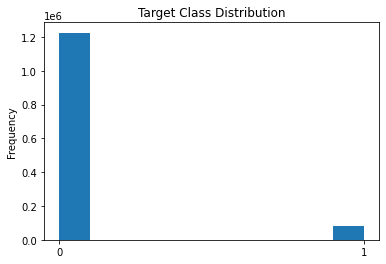

In [7]:
# Check the Distribution of the Class Labels

print(df['target'].value_counts())

# Plot
df['target'].plot(kind= 'hist', title= "Target Class Distribution")
plt.xticks(range(0,2));

## Task 4: Create tf.data.Datasets for Training and Evaluation

In [8]:
# Create Train and Validation Split with imbalance in distribution: Stratified Sampling

# Subsetting the Data for Fine-Tuning

train_df, remaining = train_test_split(df, random_state= 42, train_size = 0.0075, stratify= df['target'].values)
valid_df, _ = train_test_split(remaining, random_state= 42, train_size= 0.00075, stratify= remaining.target.values)

# Training will be around 10k samples and validation around 1000 samples

print("The Shape of Train Dataframe is", train_df.shape)
print("The Shape of Validation Dataframe is", valid_df.shape)
print("The Shape of Remaining Dataframe is", _.shape)

The Shape of Train Dataframe is (9795, 3)
The Shape of Validation Dataframe is (972, 3)
The Shape of Remaining Dataframe is (1295355, 3)


In [9]:
# BERT is Expensive to Train and has Slower inference time due to 109M+ parameters and I/O Bottleneck

# Make Efficient during Preprocessing and Loading phrase - Map using tf.data api for paralell preprocessing
# Apply all preprocessing steps on CPU so there is no GPU Overhead
with tf.device('/cpu:0'):
    # Create a Python Data Iterable object - Efficient Input Data Pipeline
    # Create a Training Dataset - Text, Label : Might be tensors or tensor_slices()
    train_data = tf.data.Dataset.from_tensor_slices((train_df['question_text'].values,
                                               train_df['target'].values))
    # Create a Validation Dataset - Text, Label
    valid_data = tf.data.Dataset.from_tensor_slices((valid_df['question_text'].values,
                                               valid_df['target'].values))
    
    # Consume elements of Data Iterable object via loops. We have created a Tensorflow Dataset!(Their type is of Tensor)
    
    # Take a look at first 3 Elements in the iterable
    for text, label in train_data.take(3):
        print(text, "----> ", label)  

tf.Tensor(b'Why are unhealthy relationships so desirable?', shape=(), dtype=string) ---->  tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b'Which war changed the course of history of the world?', shape=(), dtype=string) ---->  tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(b"I have started a YouTube channel named AskHamy (link is given below). The problem is that I don't want to show myself and instead just want to do a voice-over. What are some things which I can show on screen so that the viewers don't get bored?", shape=(), dtype=string) ---->  tf.Tensor(0, shape=(), dtype=int64)


## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [10]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

# Define Hyperparameters and Constant

# Label categories. For Multiclass problems, add more no to the label list
label_list = [0, 1]

# maximum length of (token) input sequences. BERT allows a max input of 512 tokens
max_seq_length = 128
train_batch_size = 32


# Get BERT layer and tokenizer: - Download Pretrained BERT model from Tensorflow Hub
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
# Read through the Documentation and Implement it!

# Import BERT Module as a Keras Layer
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2', 
                            trainable= True) # To Finetune all Hyperparameters/Layers instead of Freezing

# Instantiate Tokenizer, which does all Preprocessing and Tokenizing - Needs Vocab file for BERT(30k),
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy() # Output is Tensor, typecast it to Numpy.

# Making sure as we use Uncased version of BERT
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy() # Checks if the Imported module is Uncased or Not

# Instantiate Tokenizer - Imported from official.nlp.bert
tokenizer = tokenization.FullTokenizer(vocab_file= vocab_file, do_lower_case= do_lower_case)
# It handles all preprocessing of Raw text.

In [11]:
# Perform Tokenization with word piece Tokenisation

# Validate
tokenizer.wordpiece_tokenizer.tokenize("hi, how are you doing?!")
# # shows attached tokens/context

['hi', '##,', 'how', 'are', 'you', 'doing', '##?', '##!']

In [12]:
# Convert the Abve Output to Token_IDS as input for the Model

tokenizer.convert_tokens_to_ids(tokenizer.wordpiece_tokenizer.tokenize("hi, how are you doing?!"))

# Each Sequence contains 2 Tokens, <CLS> with value [101] and <SEP> with value [102] to be added.
# All tokens needs to have same length for the BERT Model.

[7632, 29623, 2129, 2024, 2017, 2725, 29632, 29612]

## Task 6: Tokenize and Preprocess Text for BERT

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1-SpKFELnEvBMBqO7h3iypo8q9uUUo96P' />
    <p style="text-align: center;color:gray">Figure 2: BERT Tokenizer</p>
</div>

Input Mask masks the length of Padded token Ids and assigns 1 if token is present and 0 otherwise to the padded id (So attention to words and not to extra padded tokens).

We also have all input type id's as 0, as BERT is trained on NSP (Next Sentence Prediction) and Masked word Prediction tasks. 
For us, we submit only 1 Sentence, so it is 0.

We'll need to transform our data into a format BERT understands. This involves two steps. First, we create InputExamples using `classifier_data_lib`'s constructor `InputExample` provided in the BERT library.

In [13]:
# This provides a function to convert row to input features and label
# Transform the Data to a format that BERT Understands.

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):

    # Creating Input Example 
    example = classifier_data_lib.InputExample(guid= None, # g unique id is Null As we work with one example at a time
                                               text_a = text.numpy(), # Text to Classify, tensors typecasted to Numpy
                                               text_b = None, # Used for Next Sentence Prediction tasks
                                               label= label.numpy())
    
    # Convert the Example to BERT Features - This Returns a Feature Object
    feature = classifier_data_lib.convert_single_example(0, example, label_list, max_seq_length, tokenizer)
    
    # Return Specific field from Feature Objects - As required by BERT Model
    return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

# This function converts Row from the Data to Input Features and Labels.
# This function can't be used directly to create our Data Structure. So we use the map function to apply the function
#     to each element of the dataset. See below

You want to use [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) to apply this function to each element of the dataset. [`Dataset.map`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map) runs in graph mode.

- Graph tensors do not have a value.
- In graph mode you can only use TensorFlow Ops and functions.

So you can't `.map` this function directly: You need to wrap it in a [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function). The [`tf.py_function`](https://www.tensorflow.org/api_docs/python/tf/py_function) will pass regular tensors (with a value and a `.numpy()` method to access it), to the wrapped python function.

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [14]:
# Apply the above function to Each Observation of the Dataset - Define/Create a Wrapper function as graph tensors doesn't have values

# You can take a python function and convert to tensorflow op using tf.py_function

def to_feature_map(text, label):
    input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp= [text, label],
                                                                  Tout= [tf.int32, tf.int32, tf.int32, tf.int32]) # As the O/P datatype is of int32 tensors
    # We converted the Graph tensors into regular tensors and passed on to the function
    # Set the Shape of Return Tensors - Max Seq Length
    input_ids.set_shape([max_seq_length])
    input_mask.set_shape([max_seq_length])
    segment_ids.set_shape([max_seq_length])
    # Labels are'nt constrained to a specific shape. They can be Task/Label Agnostic
    label_id.set_shape([])

    # Bundle the 3 Features into a Dictionary - As the BERT model Accepts
    x = {
        'input_word_ids': input_ids,
        'input_mask' : input_mask,
        'input_type_ids' : segment_ids
    }

    # Return x and Label ids - For one single Example - As a Tuple
    return  (x, label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [15]:
# Map Each Element to a Transformation (Per Element Transformation) - Create an Input Pipeline

with tf.device('/cpu:0'):
    # Creating Final train Data
    train_data = (train_data.map(to_feature_map,
                                 num_parallel_calls= tf.data.experimental.AUTOTUNE) # For Paralell processing - Autotune for Auto CPU core identification
                  .shuffle(1000)
                  .batch(32, drop_remainder= True)
                  .prefetch(tf.data.experimental.AUTOTUNE)) # Prefetch data before next step for Faster Execution and wait time


    # Creating Final valid Data 
    valid_data = (valid_data.map(to_feature_map,
                                 num_parallel_calls= tf.data.experimental.AUTOTUNE)
                  .batch(32, drop_remainder= True)
                  .prefetch(tf.data.experimental.AUTOTUNE))
  

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [16]:
# train data spec - Show Data Specification

train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [17]:
# valid data spec - Tensors of Shape (Batch_size, Max_Seq_Length)

valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 128), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

## Task 9: Add a Classification Head to the BERT Layer

<div align="center">
    <img width="512px" src='https://drive.google.com/uc?id=1fnJTeJs5HUpz7nix-F9E6EZdgUflqyEu' />
    <p style="text-align: center;color:gray">Figure 3: BERT Layer</p>
</div>

In [23]:
# Pooled output is a COntextualized representation of entire Input Sequence (Embedding of entire Input)

# Building the model: BERT Layer - Check TfHub Documentation
def create_model():
    input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
    input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_mask")
    input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                        name="input_type_ids") # We use input_type_ids instead of segment_ids
    
    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

    # If you want, add some Dense Layers else move on

    # Add Dropout Regularisation to try avoid overfitting on Training set
    drop = tf.keras.layers.Dropout(0.4) (pooled_output)

    # Output Layer with Dense 1 as its a Binary Classification Problem
    output = tf.keras.layers.Dense(1, activation= "sigmoid", name= "output") (drop)

    # Keras Model
    model = tf.keras.Model(
        inputs= {
            'input_word_ids': input_word_ids,
            'input_mask' : input_mask,
            'input_type_ids' : input_type_ids # We renamed segment_ids
        },
        outputs= output)
    
    return model

## Task 10: Fine-Tune BERT for Text Classification

In [24]:
# Invoke the Model
model = create_model()

# Compile the Model - It is Overparameterized model and can lead to overfitting easily. Use low LR
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate= 2e-5),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics= [tf.keras.metrics.BinaryAccuracy()]) # Not the best metrics as we have Class Imbalance

# Model Summary
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 128)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

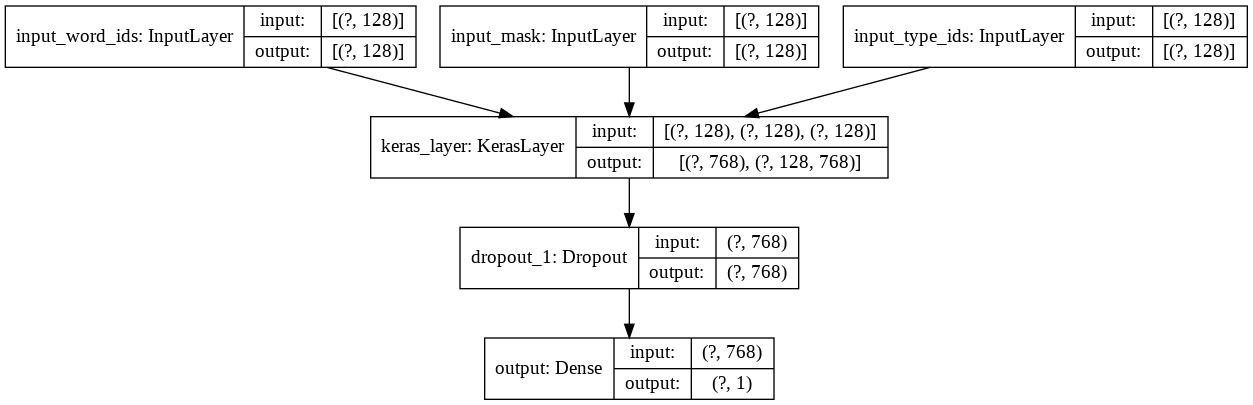

In [25]:
# Visualize the Summary
tf.keras.utils.plot_model(model= model, show_shapes= True, dpi= 96)

In [28]:
# Train the model

epochs = 5
history= model.fit(train_data,
                   validation_data= valid_data,
                   epochs= epochs,
                   verbose= 1)

Epoch 1/5
306/306 [==============================] - ETA: 0s - loss: 0.1485 - binary_accuracy: 0.9430WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0159s vs `on_test_batch_end` time: 0.1361s). Check your callbacks.


306/306 [==============================] - 148s 482ms/step - loss: 0.1485 - binary_accuracy: 0.9430 - val_loss: 0.1410 - val_binary_accuracy: 0.9510
Epoch 2/5
306/306 [==============================] - 147s 480ms/step - loss: 0.0956 - binary_accuracy: 0.9647 - val_loss: 0.1208 - val_binary_accuracy: 0.9583
Epoch 3/5
306/306 [==============================] - 147s 480ms/step - loss: 0.0511 - binary_accuracy: 0.9836 - val_loss: 0.1576 - val_binary_accuracy: 0.9542
Epoch 4/5
306/306 [==============================] - 147s 480ms/step - loss: 0.0225 - binary_accuracy: 0.9927 - val_loss: 0.2290 - val_binary_accuracy: 0.9542
Epoch 5/5
306/306 [==============================] - 147s 480ms/step - loss: 0.0161 - binary_accuracy: 0.9954 - val_loss: 0.2059 - val_binary_accuracy: 0.9552


## Task 11: Evaluate the BERT Text Classification Model

In [29]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

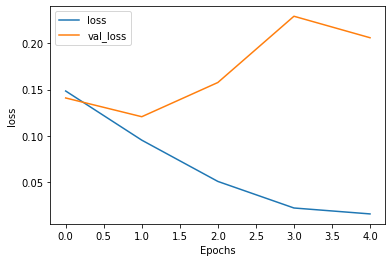

In [30]:
# Plot Loss
plot_graphs(history, 'loss')

# Model Overfits after 2 Epochs

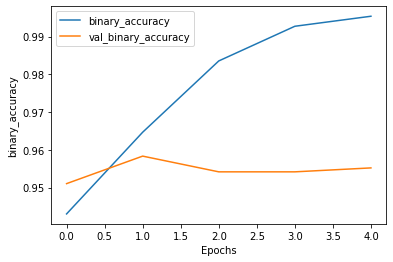

In [31]:
# Plot Binary Accuracy
plot_graphs(history, 'binary_accuracy')

# Model Overfits after 2 Epochs

In [46]:
# Sample Input Example

sample_example = ["Should America be made an anti-Islamic country", 
                  "Am I the only liberal who's happy that the economies of the American southern states are pathetically poor?",
                  "Its so good to be here"]

test_dataset = tf.data.Dataset.from_tensor_slices((sample_example, [0]*len(sample_example))) # Fill vector of 0

# Mapping the Data
test_dataset = (test_dataset.map(to_feature_map).batch(1))
preds = model.predict(test_dataset)

# Define Classification Threshold
threshold = 0.5

['Insincere' if pred >= threshold else 'Sincere' for pred in preds]

['Insincere', 'Insincere', 'Sincere']

Process: After the Input List is populated, Create a Tensorflow Dataset from it, and use dataset.map function to map raw string to BERT required input data structures. Then pass the Data Structure to the Model predict function for predictions